# Spotify Music Recommender

### By: Soorya Parthiban

## Importing the required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Importing the data set

In [6]:
spotify_df = pd.read_csv(r"data.csv")

In [7]:
spotify_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
0,0.803,0.6240,7,-6.764,0,0.0477,0.451,0.000734,0.1000,0.6280,95.968,304524,4,0
1,0.762,0.7030,10,-7.951,0,0.3060,0.206,0.000000,0.0912,0.5190,151.329,247178,4,1
2,0.261,0.0149,1,-27.528,1,0.0419,0.992,0.897000,0.1020,0.0382,75.296,286987,4,0
3,0.722,0.7360,3,-6.994,0,0.0585,0.431,0.000001,0.1230,0.5820,89.860,208920,4,1
4,0.787,0.5720,1,-7.516,1,0.2220,0.145,0.000000,0.0753,0.6470,155.117,179413,4,1


In [8]:
spotify_df.tail()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
190,0.166,0.0551,9,-19.494,0,0.0520,0.9760,0.635000,0.1190,0.143,176.616,206520,3,0
191,0.862,0.6240,3,-11.630,1,0.0565,0.0192,0.000153,0.0465,0.882,124.896,254240,4,0
192,0.499,0.3510,9,-11.509,0,0.0448,0.9510,0.000099,0.1180,0.616,90.664,235947,4,0
193,0.574,0.7290,10,-5.838,0,0.0965,0.0406,0.000004,0.1940,0.413,110.547,190239,5,1
194,0.747,0.6660,11,-7.845,1,0.1970,0.1300,0.000000,0.3600,0.531,77.507,177213,4,1


In [9]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      195 non-null    float64
 1   energy            195 non-null    float64
 2   key               195 non-null    int64  
 3   loudness          195 non-null    float64
 4   mode              195 non-null    int64  
 5   speechiness       195 non-null    float64
 6   acousticness      195 non-null    float64
 7   instrumentalness  195 non-null    float64
 8   liveness          195 non-null    float64
 9   valence           195 non-null    float64
 10  tempo             195 non-null    float64
 11  duration_ms       195 non-null    int64  
 12  time_signature    195 non-null    int64  
 13  liked             195 non-null    int64  
dtypes: float64(9), int64(5)
memory usage: 21.5 KB


In [10]:
spotify_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,liked
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,0.636656,0.638431,5.497436,-9.481631,0.538462,0.148957,0.319093,0.192337,0.148455,0.493632,121.086174,213408.933333,3.912821,0.512821
std,0.216614,0.260096,3.415209,6.525086,0.499802,0.120414,0.320782,0.346226,0.105975,0.267695,28.084829,72152.392864,0.451332,0.501122
min,0.130000,0.002400,0.000000,-42.261000,0.000000,0.027800,0.000003,0.000000,0.033100,0.035300,60.171000,77203.000000,1.000000,0.000000
25%,0.462500,0.533500,2.000000,-9.962000,0.000000,0.056800,0.042200,0.000000,0.084000,0.269000,100.242000,178300.500000,4.000000,0.000000
50%,0.705000,0.659000,6.000000,-7.766000,1.000000,0.096200,0.213000,0.000008,0.105000,0.525000,124.896000,204000.000000,4.000000,1.000000
75%,0.799000,0.837500,8.000000,-5.829000,1.000000,0.230500,0.504000,0.097500,0.177000,0.717500,142.460500,242373.500000,4.000000,1.000000
max,0.946000,0.996000,11.000000,-2.336000,1.000000,0.540000,0.995000,0.969000,0.633000,0.980000,180.036000,655213.000000,5.000000,1.000000


In [11]:
spotify_df.isnull().sum()

danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
liked               0
dtype: int64

In [12]:
spotify_df['liked'].value_counts()

liked
1    100
0     95
Name: count, dtype: int64

# Data Pre-Processing

### Creating Train & Test sets

In [13]:
X = spotify_df.drop('liked', axis=1)
y = spotify_df['liked']

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [16]:
print(X_train.shape, X_test.shape)

(136, 13) (59, 13)


In [17]:
print(y_train.shape, y_test.shape)

(136,) (59,)


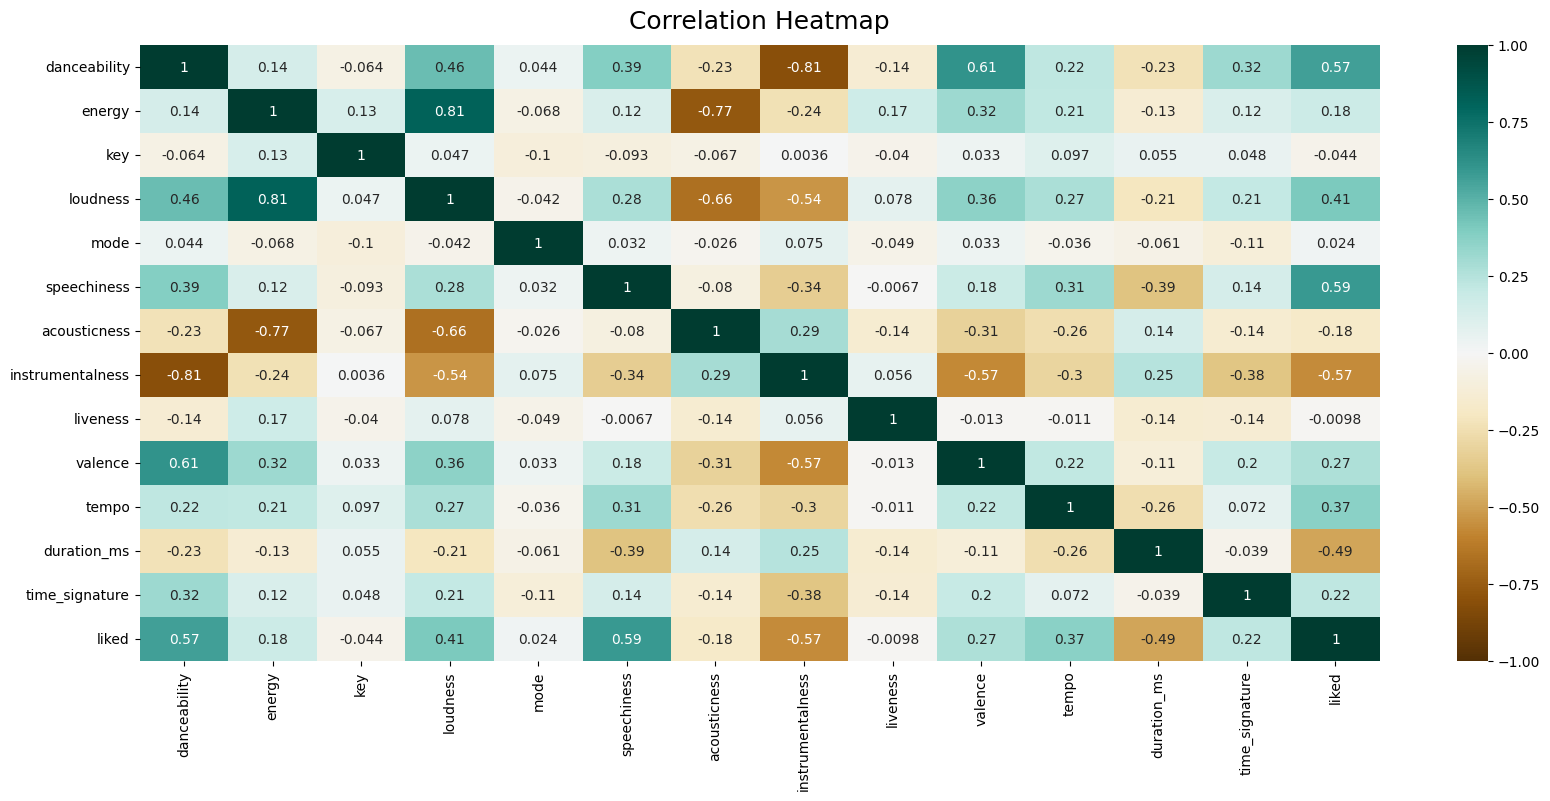

In [18]:
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(spotify_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

## Building ML Models

### Decision Tree Classifier

In [19]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [20]:
dt_clf = DecisionTreeClassifier()

In [21]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
y_preds_dt = dt_clf.predict(X_test) 

In [23]:
print("Accuracy Score of the Decision Tree Model", accuracy_score(y_test, y_preds_dt))

Accuracy Score of the Decision Tree Model 0.8813559322033898


In [24]:
print("ROC AUC Score of the Decision Tree Model", roc_auc_score(y_test, y_preds_dt))

ROC AUC Score of the Decision Tree Model 0.9


Text(0.5, 1.0, 'Confusion Matrix for Decision Tree Model')

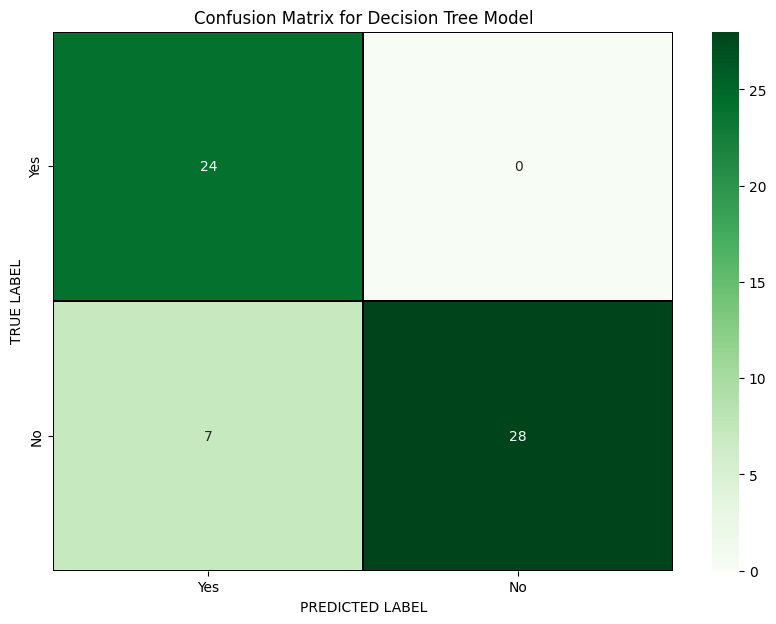

In [25]:
#Confusion Matrix of Decision Tree Model.
cm = confusion_matrix(y_test, y_preds_dt)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Model')

### Ensemble Models

#### Random Forest Classifier 

In [26]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier

In [27]:
rf_clf = RandomForestClassifier(n_estimators=100)
extraTree_clf = ExtraTreesClassifier(n_estimators=100)
bg_clf = BaggingClassifier(n_estimators=100)
ada_clf = AdaBoostClassifier(n_estimators=100)

In [28]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
extraTree_clf.fit(X_train, y_train)

ExtraTreesClassifier()

In [30]:
bg_clf.fit(X_train, y_train)

BaggingClassifier(n_estimators=100)

In [31]:
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [32]:
y_preds_rf = rf_clf.predict(X_test) 
y_preds_et = extraTree_clf.predict(X_test) 
y_preds_bg = bg_clf.predict(X_test) 
y_preds_ada = ada_clf.predict(X_test) 

In [33]:
print("Accuracy Score of the Random Forest Model", accuracy_score(y_test, y_preds_rf))
print("Accuracy Score of the Extre Tree Classifier Model", accuracy_score(y_test, y_preds_et))
print("Accuracy Score of the Bagging Classifier Model", accuracy_score(y_test, y_preds_bg))
print("Accuracy Score of the AdaBoost Classifier Model", accuracy_score(y_test, y_preds_ada))

Accuracy Score of the Random Forest Model 0.9491525423728814
Accuracy Score of the Extre Tree Classifier Model 0.9491525423728814
Accuracy Score of the Bagging Classifier Model 0.9152542372881356
Accuracy Score of the AdaBoost Classifier Model 0.9661016949152542


In [34]:
print("ROC AUC Score of the Random Forest Model", roc_auc_score(y_test, y_preds_rf))
print("ROC AUC Score of the Extre Tree Classifier Model", roc_auc_score(y_test, y_preds_et))
print("ROC AUC Score of the Bagging Classifier Model", roc_auc_score(y_test, y_preds_bg))
print("ROC AUC Score of the AdaBoost Classifier Model", roc_auc_score(y_test, y_preds_ada))

ROC AUC Score of the Random Forest Model 0.944047619047619
ROC AUC Score of the Extre Tree Classifier Model 0.944047619047619
ROC AUC Score of the Bagging Classifier Model 0.9154761904761903
ROC AUC Score of the AdaBoost Classifier Model 0.9648809523809525


Text(0.5, 1.0, 'Confusion Matrix for Random Forest Classifier Model')

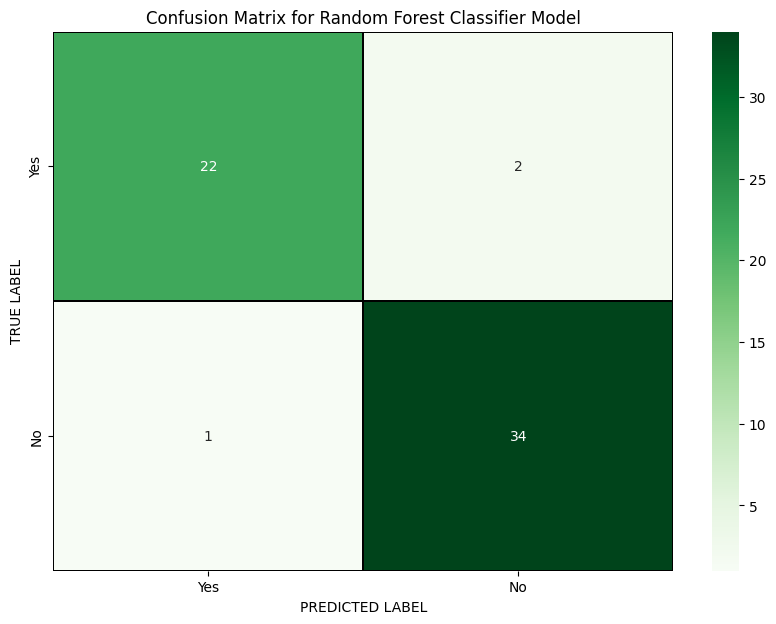

In [35]:
#Confusion Matrix of Random Forest Classifier Model.
cm = confusion_matrix(y_test, y_preds_rf)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier Model')

Text(0.5, 1.0, 'Confusion Matrix for Extra Tree Classifier Model')

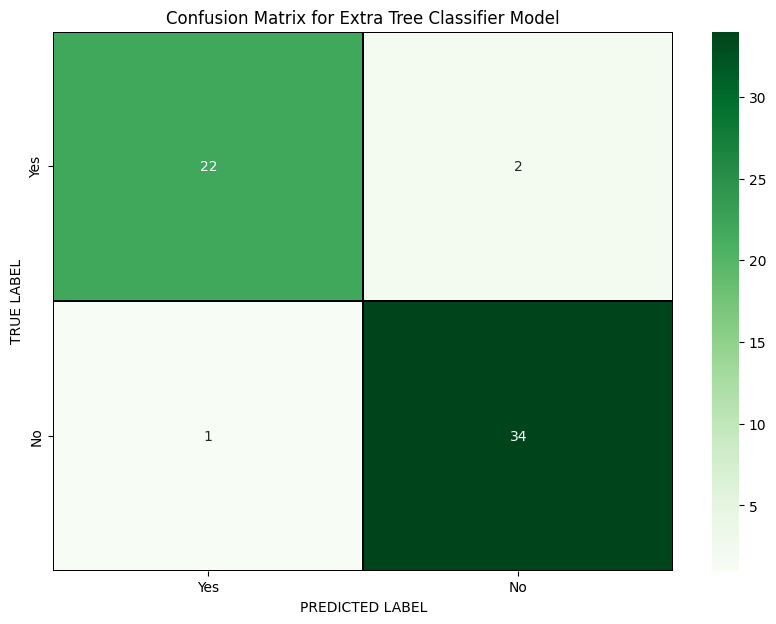

In [36]:
#Confusion Matrix of Extra Tree Classifier Model.
cm = confusion_matrix(y_test, y_preds_et)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Extra Tree Classifier Model')

Text(0.5, 1.0, 'Confusion Matrix for Bagging Classifier Model')

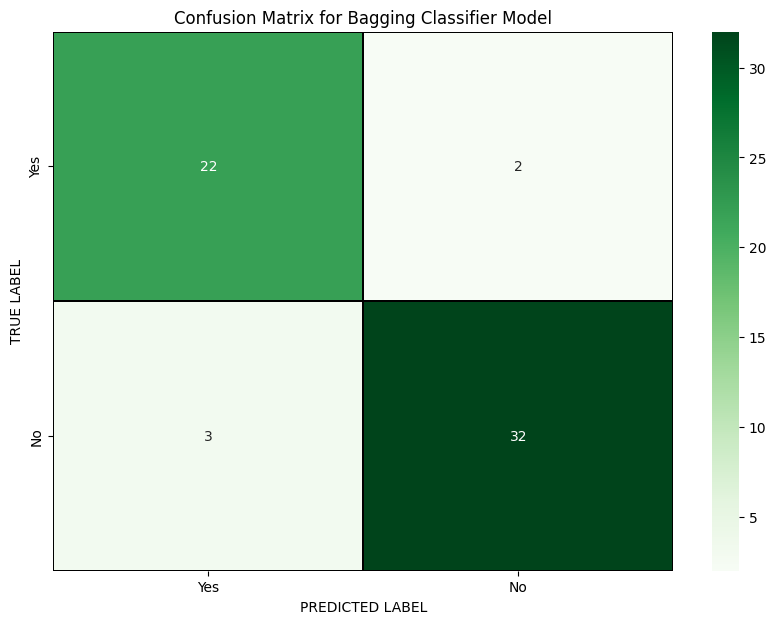

In [37]:
#Confusion Matrix of Bagging Classifier Model.
cm = confusion_matrix(y_test, y_preds_bg)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Bagging Classifier Model')

Text(0.5, 1.0, 'Confusion Matrix for AdaBoost Classifier Model')

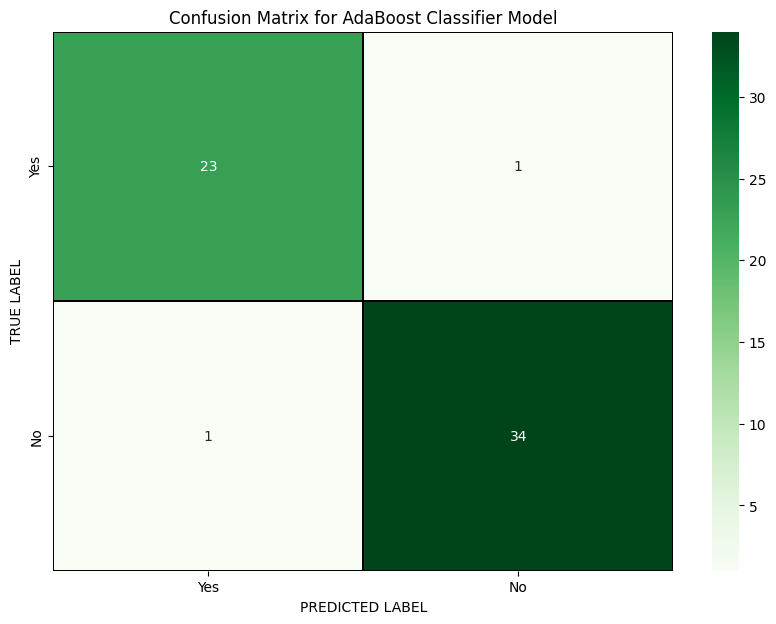

In [38]:
#Confusion Matrix of AdaBoost Classifier Model.
cm = confusion_matrix(y_test, y_preds_ada)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for AdaBoost Classifier Model')

### LGBM Classifier

In [40]:
from lightgbm import LGBMClassifier

In [41]:
lgbm_clf = LGBMClassifier()

In [42]:
lgbm_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 65, number of negative: 71
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 456
[LightGBM] [Info] Number of data points in the train set: 136, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.477941 -> initscore=-0.088293
[LightGBM] [Info] Start training from score -0.088293
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

LGBMClassifier()

In [43]:
y_preds_lgbm = lgbm_clf.predict(X_test)

In [44]:
print("Accuracy Score of the LGBM Model", accuracy_score(y_test, y_preds_lgbm))

Accuracy Score of the LGBM Model 0.9322033898305084


In [45]:
print("ROC AUC Score of the LGBM Model", roc_auc_score(y_test, y_preds_lgbm))

ROC AUC Score of the LGBM Model 0.9297619047619047


Text(0.5, 1.0, 'Confusion Matrix for LGBM Classifier Model')

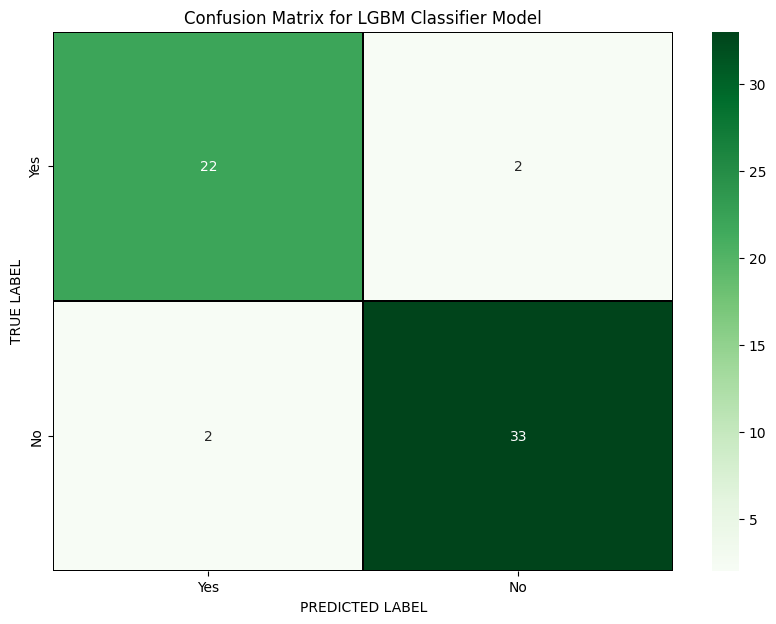

In [46]:
#Confusion Matrix of LGBM Classifier Model.
cm = confusion_matrix(y_test, y_preds_lgbm)

x_axis_labels = ["Yes", "No"]
y_axis_labels = ["Yes", "No"]

f, ax = plt.subplots(figsize =(10,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Greens", 
            xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for LGBM Classifier Model')

## Saving the best model

In [47]:
from joblib import dump
MODEL_NAME = "spotify-recommender.pkl"
dump(extraTree_clf, MODEL_NAME)

['spotify-recommender.pkl']